## Proceso ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # permite dividir la data en entrenamiento y prueba
from sklearn.linear_model import LinearRegression # implementar el algoritmo de ML ESTE CAMBIA SEGUN EL ALGORITMO
from sklearn.preprocessing import minmax_scale #libreria para normalizar los datos 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

##  1. Obtención de datos (Lectura de data )

In [2]:
tesis_df = pd.read_excel('data.xlsx')
tesis_df

,año,id_diee,Sect_Econ,tam_empresa,provincia,tic1_inversion,tic2_valor_inversion,tic31_computadoras,tic32_pda,tic33_smartphone,...,tic121_telefonos_celulares,tic122_correo_electronico,tic123_redes_sociales,tic14_especialistas_tic,tic141_especialistas_tic_m,tic142_especialistas_tic_h,tic151_personal_conoc_tic,tic151_personal_conoc_tic_m,tic152_personal_conoc_tic_h,tic16_intranet
0,2012,13582534017,SERVICIOS,PEQUEÑAEMPRESA,AZUAY,No,0.0,5,0,0,...,Si,Si,No,No,NaN,NaN,8,3,5,No
1,2013,13582673017,SERVICIOS,PEQUEÑAEMPRESA,AZUAY,Si,3634.0,4,0,0,...,Si,Si,No,No,0.0,0.0,0,0,0,No
2,2014,13582673017,SERVICIOS,PEQUEÑAEMPRESA,AZUAY,No,0.0,3,0,0,...,No,Si,No,No,0.0,0.0,2,2,0,No
3,2015,13582673017,4,2,101,1,3064.0,3,0,0,...,1,1,2,2,NaN,NaN,0,0,0,2
4,2013,13582772015,MANUFACTURA,PEQUEÑAEMPRESA,AZUAY,No,0.0,7,0,0,...,Si,Si,No,No,0.0,0.0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15066,2015,46786977223,3,3,322,2,0.0,15,0,0,...,1,1,1,1,0.0,1.0,20,8,12,2
15067,2015,46789417059,1,3,105,2,0.0,10,0,0,...,1,1,2,2,NaN,NaN,9,4,5,2
15068,2015,46826132183,4,2,118,1,746.0,4,0,0,...,1,1,1,2,NaN,NaN,4,3,1,2
15069,2015,46873591188,1,4,118,1,29000.0,29,0,0,...,1,1,1,1,0.0,1.0,33,15,18,1


## Información (resumen) del DataFrame 

In [3]:
tesis_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15071 entries, 0 to 15070
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   año                          15071 non-null  int64  
 1   id_diee                      15071 non-null  int64  
 2   Sect_Econ                    15071 non-null  object 
 3   tam_empresa                  15071 non-null  object 
 4   provincia                    15071 non-null  object 
 5   tic1_inversion               15071 non-null  object 
 6   tic2_valor_inversion         15071 non-null  float64
 7   tic31_computadoras           15071 non-null  int64  
 8   tic32_pda                    15071 non-null  int64  
 9   tic33_smartphone             15071 non-null  int64  
 10  tic34_notebooks              15071 non-null  int64  
 11  tic35_tablets                15071 non-null  int64  
 12  tic5_conexion_internet       15071 non-null  object 
 13  tic6_personal_to

## Estadísticas de las columnas numéricas .describe()

In [4]:
tesis_df.describe()

,año,id_diee,tic2_valor_inversion,tic31_computadoras,tic32_pda,tic33_smartphone,tic34_notebooks,tic35_tablets,tic6_personal_total_int,tic61_personal_int_m,tic62_personal_int_h,tic141_especialistas_tic_m,tic142_especialistas_tic_h,tic151_personal_conoc_tic,tic151_personal_conoc_tic_m,tic152_personal_conoc_tic_h
count,15071.000000,1.507100e+04,1.507100e+04,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,14960.000000,10832.000000,10832.000000,8961.000000,8961.000000,15071.000000,15071.000000,15071.000000
mean,2013.407339,1.562120e+10,5.095299e+04,48.223476,1.671356,5.515095,7.176100,1.760799,44.380281,21.189346,27.608013,0.528512,1.416918,9.286311,3.757349,5.528830
std,1.104505,6.365339e+09,7.557917e+05,244.412819,24.939544,44.431839,63.929901,16.307189,186.458973,78.716732,145.399100,4.721259,7.628427,72.258969,30.576725,43.143868
min,2012.000000,1.358253e+10,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,1.370831e+10,0.000000e+00,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,1.382739e+10,0.000000e+00,12.000000,0.000000,0.000000,0.000000,0.000000,12.000000,6.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2014.000000,1.473857e+10,6.570500e+03,30.000000,0.000000,0.000000,1.000000,0.000000,32.000000,16.000000,18.000000,0.000000,1.000000,4.000000,2.000000,2.000000
max,2015.000000,4.700890e+10,5.400916e+07,8500.000000,1403.000000,2520.000000,3953.000000,1000.000000,8673.000000,3259.000000,5923.000000,346.000000,350.000000,6451.000000,2838.000000,3613.000000


In [5]:
tesis_df.isna().sum().sort_values()

año                               0
tic151_personal_conoc_tic_m       0
tic151_personal_conoc_tic         0
tic14_especialistas_tic           0
tic121_telefonos_celulares        0
tic152_personal_conoc_tic_h       0
tic5_conexion_internet            0
tic35_tablets                     0
tic34_notebooks                   0
tic16_intranet                    0
tic32_pda                         0
id_diee                           0
Sect_Econ                         0
tam_empresa                       0
tic33_smartphone                  0
provincia                         0
tic1_inversion                    0
tic2_valor_inversion              0
tic31_computadoras                0
tic7a_bandaanchafija            111
tic7b_bandaanchamovil           111
tic8_web                        111
tic122_correo_electronico       111
tic123_redes_sociales           111
tic6_personal_total_int         111
tic62_personal_int_h           4239
tic61_personal_int_m           4239
tic141_especialistas_tic_m  

<Axes: >

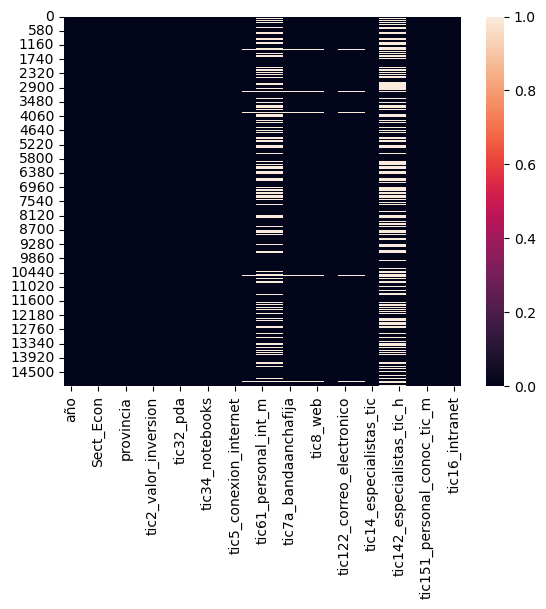

In [6]:
sns.heatmap(tesis_df.isna())

In [7]:
# Con este codigo consultamos cuantas categorias o subniveles tiene las columnas tipo objeto  
col_categorias =tesis_df.select_dtypes(include=['object']).columns  
             
for col in col_categorias:
    print(f'Columna {col}: {tesis_df[col].nunique()} opciones')

Columna Sect_Econ: 8 opciones
Columna tam_empresa: 10 opciones
Columna provincia: 48 opciones
Columna tic1_inversion: 4 opciones
Columna tic5_conexion_internet: 4 opciones
Columna tic7a_bandaanchafija: 4 opciones
Columna tic7b_bandaanchamovil: 4 opciones
Columna tic8_web: 5 opciones
Columna tic121_telefonos_celulares: 4 opciones
Columna tic122_correo_electronico: 4 opciones
Columna tic123_redes_sociales: 4 opciones
Columna tic14_especialistas_tic: 4 opciones
Columna tic16_intranet: 4 opciones


In [8]:
# Con este codigo consultamos las categorias o subniveles de las columnas tipo objeto  
col_categorias =tesis_df.select_dtypes(include=['object']).columns  
             
for col in col_categorias:
    print(f'Columna {col}: {tesis_df[col].unique()} ')

Columna Sect_Econ: ['SERVICIOS' 4 'MANUFACTURA' 'COMERCIO' 3 1 'MINERÍA' 2] 
Columna tam_empresa: ['PEQUEÑAEMPRESA' 2 'MEDIANAEMPRESAA' 3 'MEDIANAEMPRESAB' 4 'MICROEMPRESA'
 5 'GRANDEEMPRESA' 1] 
Columna provincia: ['AZUAY' 101 'SUCUMBÍOS' 'CARCHI' 'GUAYAS' 209 'MORONASANTIAGO'
 'TUNGURAHUA' 'CAÑAR' 'PICHINCHA' 117 'STO.DOMINGODELOSTSÁCHILAS' 123
 'ZAMORACHINCHIPE' 319 'ELORO' 207 314 'LOJA' 'COTOPAXI' 105 118 'LOSRÍOS'
 'BOLÍVAR' 103 'IMBABURA' 110 104 'ORELLANA' 'CHIMBORAZO' 'MANABÍ' 213 106
 'PASTAZA' 316 322 'ESMERALDAS' 208 'GALÁPAGOS' 'SANTAELENA' 212 224 420
 111 'NAPO' 315 321 102] 
Columna tic1_inversion: ['No' 'Si' 1 2] 
Columna tic5_conexion_internet: ['Si' 1 'No' 2] 
Columna tic7a_bandaanchafija: ['Si' 1 'No' nan 2] 
Columna tic7b_bandaanchamovil: ['No' 2 'Si' 1 nan] 
Columna tic8_web: ['Si' 1 'No' 'Noinforma' 2 nan] 
Columna tic121_telefonos_celulares: ['Si' 'No' 1 2] 
Columna tic122_correo_electronico: ['Si' 1 'No' nan 2] 
Columna tic123_redes_sociales: ['No' 2 'Si' 1 nan

<Axes: xlabel='tic1_inversion', ylabel='count'>

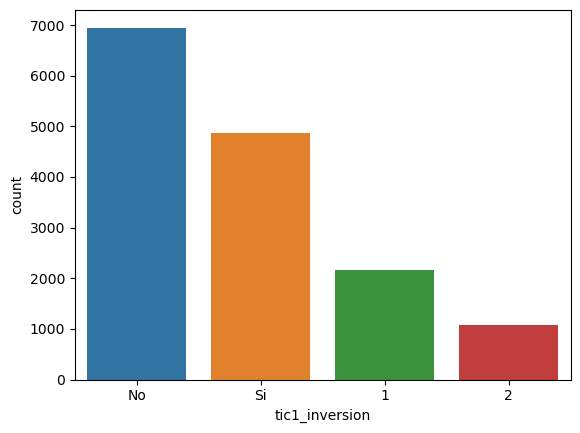

In [9]:
sns.countplot(x="tic1_inversion", data=tesis_df)

<Axes: xlabel='Sect_Econ', ylabel='count'>

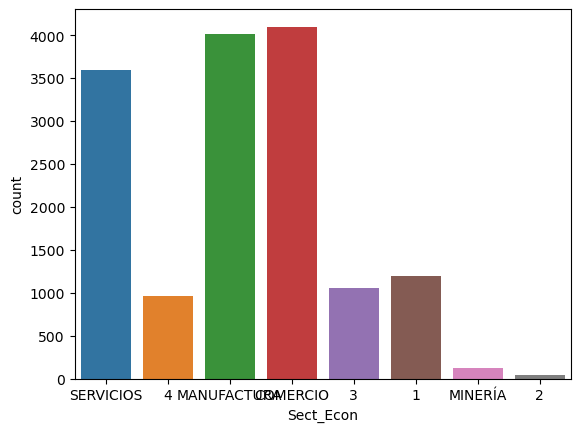

In [10]:
sns.countplot(x="Sect_Econ", data=tesis_df)

<Axes: xlabel='tam_empresa', ylabel='count'>

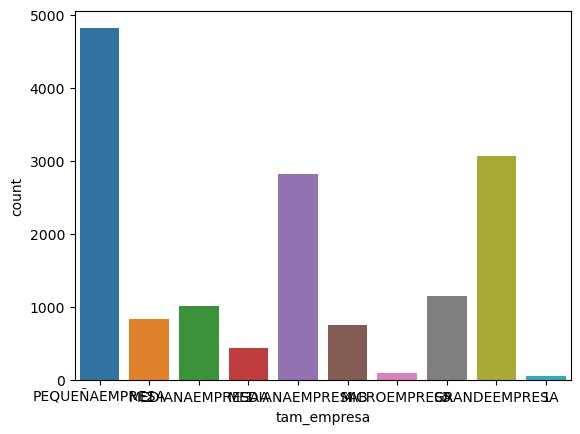

In [11]:
sns.countplot(x="tam_empresa", data=tesis_df)

<Axes: xlabel='provincia', ylabel='count'>

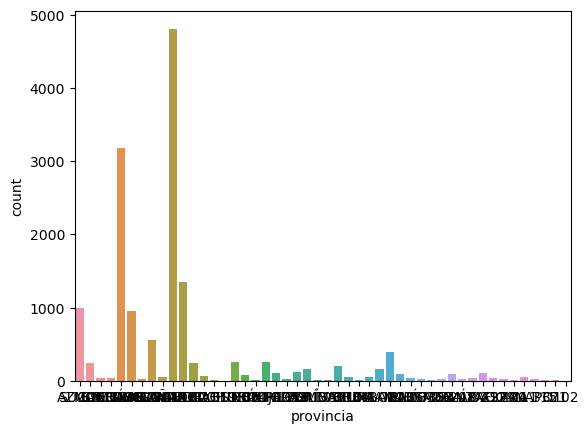

In [12]:
sns.countplot(x="provincia", data=tesis_df)

<Axes: xlabel='tic1_inversion', ylabel='count'>

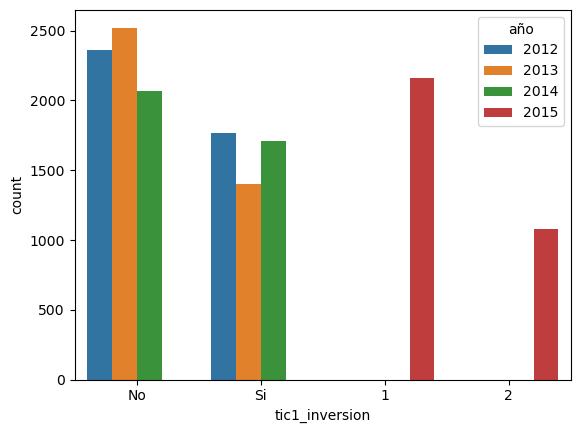

In [13]:
sns.countplot(x="tic1_inversion", data=tesis_df, hue="año")

<Axes: xlabel='tic1_inversion', ylabel='count'>

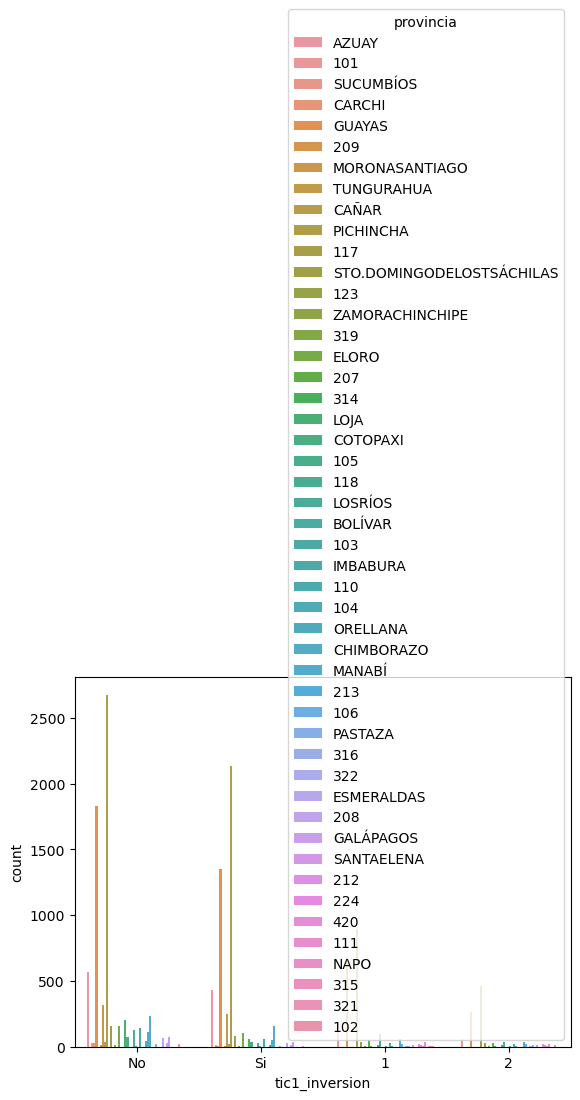

In [14]:
sns.countplot(x="tic1_inversion", data=tesis_df, hue="provincia")

## 2. Limpieza de datos 

In [15]:
# Conteo de filas y columnas
tesis_df.shape 

(15071, 29)

In [16]:
# Conteo de datos nulos
tesis_df.isna().sum().sort_values()

año                               0
tic151_personal_conoc_tic_m       0
tic151_personal_conoc_tic         0
tic14_especialistas_tic           0
tic121_telefonos_celulares        0
tic152_personal_conoc_tic_h       0
tic5_conexion_internet            0
tic35_tablets                     0
tic34_notebooks                   0
tic16_intranet                    0
tic32_pda                         0
id_diee                           0
Sect_Econ                         0
tam_empresa                       0
tic33_smartphone                  0
provincia                         0
tic1_inversion                    0
tic2_valor_inversion              0
tic31_computadoras                0
tic7a_bandaanchafija            111
tic7b_bandaanchamovil           111
tic8_web                        111
tic122_correo_electronico       111
tic123_redes_sociales           111
tic6_personal_total_int         111
tic62_personal_int_h           4239
tic61_personal_int_m           4239
tic141_especialistas_tic_m  

In [17]:
# Muestra los nombres de todas las columnas
tesis_df.columns  

Index(['año', 'id_diee', 'Sect_Econ', 'tam_empresa', 'provincia',
       'tic1_inversion', 'tic2_valor_inversion', 'tic31_computadoras',
       'tic32_pda', 'tic33_smartphone', 'tic34_notebooks', 'tic35_tablets',
       'tic5_conexion_internet', 'tic6_personal_total_int',
       'tic61_personal_int_m', 'tic62_personal_int_h', 'tic7a_bandaanchafija',
       'tic7b_bandaanchamovil', 'tic8_web', 'tic121_telefonos_celulares',
       'tic122_correo_electronico', 'tic123_redes_sociales',
       'tic14_especialistas_tic', 'tic141_especialistas_tic_m',
       'tic142_especialistas_tic_h', 'tic151_personal_conoc_tic',
       'tic151_personal_conoc_tic_m', 'tic152_personal_conoc_tic_h',
       'tic16_intranet'],
      dtype='object')

In [18]:
# Eliminamos las columnas con exceso de datos nulos que despues
# de hacer el analisis se determina que no se puede completar los faltantes 
# tambien eliminamos la columna id_diee por que se considera relevante

tesis_df.drop(['id_diee','tic62_personal_int_h','tic61_personal_int_m','tic141_especialistas_tic_m','tic142_especialistas_tic_h'], axis=1, inplace = True)

# Imprimir las columans y datos nulos para verificar las columnas eliminadas
tesis_df.isna().sum().sort_values()



año                              0
tic151_personal_conoc_tic_m      0
tic151_personal_conoc_tic        0
tic14_especialistas_tic          0
tic121_telefonos_celulares       0
tic152_personal_conoc_tic_h      0
tic35_tablets                    0
tic34_notebooks                  0
tic5_conexion_internet           0
tic32_pda                        0
tic31_computadoras               0
tic2_valor_inversion             0
tic1_inversion                   0
provincia                        0
tam_empresa                      0
Sect_Econ                        0
tic33_smartphone                 0
tic16_intranet                   0
tic6_personal_total_int        111
tic7a_bandaanchafija           111
tic7b_bandaanchamovil          111
tic8_web                       111
tic122_correo_electronico      111
tic123_redes_sociales          111
dtype: int64

In [19]:
tesis_df=tesis_df.rename(columns={'Sect_Econ':'Sector_Económico', 
        'tam_empresa':'Tamaño_Empresa', 'provincia':'Provincia',
        'tic1_inversion':'Inversion_Tic','tic2_valor_inversion':'Valor_Inversion', 
        'tic31_computadoras':'Computador_cant','tic32_pda':'Pda_cant', 
        'tic33_smartphone':'Celular_cant','tic34_notebooks':'Notebooks_cant', 
        'tic35_tablets':'Tablet_cant','tic5_conexion_internet':'Conexion_Internet', 
        'tic6_personal_total_int':'Personal_q_uso_Internet','tic7a_bandaanchafija':'Internet_ba_Fija',
        'tic7b_bandaanchamovil':'Internet_ba_Movil','tic121_telefonos_celulares':'Uso_Celular',
        'tic122_correo_electronico':'Uso_Email', 'tic123_redes_sociales':'Uso_R_Sociales',
        'tic14_especialistas_tic':'Especialistas_tic','tic151_personal_conoc_tic':'Personal_Conocimiento_tic',
        'tic151_personal_conoc_tic_m':'Mujeres_Conocimiento_tic', 'tic152_personal_conoc_tic_h':'Hombres_Conocimiento_tic',
        'tic16_intranet':'Intranet','tic8_web':'Pag_Web'})

tesis_df.columns

Index(['año', 'Sector_Económico', 'Tamaño_Empresa', 'Provincia',
       'Inversion_Tic', 'Valor_Inversion', 'Computador_cant', 'Pda_cant',
       'Celular_cant', 'Notebooks_cant', 'Tablet_cant', 'Conexion_Internet',
       'Personal_q_uso_Internet', 'Internet_ba_Fija', 'Internet_ba_Movil',
       'Pag_Web', 'Uso_Celular', 'Uso_Email', 'Uso_R_Sociales',
       'Especialistas_tic', 'Personal_Conocimiento_tic',
       'Mujeres_Conocimiento_tic', 'Hombres_Conocimiento_tic', 'Intranet'],
      dtype='object')

In [20]:
# depuracion de la columnas categoricas (reemplazar datos numericos)

# Columna que se refiere al Sector Económico
tesis_df['Sector_Económico'] = tesis_df['Sector_Económico'].replace(
    {1: 'MANUFACTURA',
     2: 'MINERÍA',
     3: 'COMERCIO',
     4: 'SERVICIOS'})

# Columna que se refiere a Tamaño de la Empresa
tesis_df['Tamaño_Empresa'] = tesis_df['Tamaño_Empresa'].replace(
    {1: 'MICRO EMPRESA',
     2: 'PEQUEÑA EMPRESA',
     3: 'MEDIANA EMPRESA A',
     4: 'MEDIANA EMPRESA B',
     5: 'GRANDE EMPRESA',
     'MICROEMPRESA': 'MICRO EMPRESA',
     'PEQUEÑAEMPRESA': 'PEQUEÑA EMPRESA',
     'MEDIANAEMPRESAA': 'MEDIANA EMPRESA A',
     'MEDIANAEMPRESAB': 'MEDIANA EMPRESA B',
     'GRANDEEMPRESA': 'GRANDE EMPRESA'})

col_categorias = tesis_df[['Sector_Económico','Tamaño_Empresa']]  
             
for col in col_categorias:
    print(f'Columna {col}: {tesis_df[col].unique()} ')

Columna Sector_Económico: ['SERVICIOS' 'MANUFACTURA' 'COMERCIO' 'MINERÍA'] 
Columna Tamaño_Empresa: ['PEQUEÑA EMPRESA' 'MEDIANA EMPRESA A' 'MEDIANA EMPRESA B' 'MICRO EMPRESA'
 'GRANDE EMPRESA'] 


In [21]:
# depuracion de la columnas (reemplazar datos str 'SI==1','No==0')

# Columna que se refiere Si invirtieron en TIC
tesis_df['Inversion_Tic'] = tesis_df['Inversion_Tic'].replace(
    {2: 0,
     'Si': 1,
     'No': 0})

# Columna que se refiere Si tuvieron conexion a Internet
tesis_df['Conexion_Internet'] = tesis_df['Conexion_Internet'].replace(
    {2: 0,
     'Si': 1,
     'No': 0})


# Columna que se refiere Si usaron internet de banda ancha fija  
tesis_df['Internet_ba_Fija'] = tesis_df['Internet_ba_Fija'].replace(
    {2: 0,
     'Si': 1,
     'No': 0})

# Columna que se refiere Si Si usaron internet de banda ancha movil  
tesis_df['Internet_ba_Movil'] = tesis_df['Internet_ba_Movil'].replace(
    {2: 0,
     'Si': 1,
     'No': 0})


# Columna que se refiere Si usaron telefonos celulares
tesis_df['Uso_Celular'] = tesis_df['Uso_Celular'].replace(
    {2: 0,
     'Si': 1,
     'No': 0})

# Columna que se refiere Si usaron correo electronico
tesis_df['Uso_Email'] = tesis_df['Uso_Email'].replace(
    {2: 0,
     'Si': 1,
     'No': 0})

# Columna que se refiere Si usaron redes sociales
tesis_df['Uso_R_Sociales'] = tesis_df['Uso_R_Sociales'].replace(
    {2: 0,
     'Si': 1,
     'No': 0})

# Columna que se refiere Si tuvieron personal especialistas en TIC 
tesis_df['Especialistas_tic'] = tesis_df['Especialistas_tic'].replace(
    {2: 0,
     'Si': 1,
     'No': 0})



# Columna que se refiere Si tuvieron Página Web 
tesis_df['Pag_Web'] = tesis_df['Pag_Web'].replace(
    {2: 0,
     'Si': 1,
     'No': 0,
     'Noinforma':0})

# Columna que se refiere Si tuvieron Intranet
tesis_df['Intranet'] = tesis_df['Intranet'].replace(
    {2: 0,
     'Si': 1,
     'No': 0})


col_categorias = tesis_df[['Inversion_Tic','Conexion_Internet',
                           'Internet_ba_Fija','Internet_ba_Movil',
                           'Uso_Celular','Uso_Email',
                           'Uso_R_Sociales','Especialistas_tic',
                           'Intranet','Pag_Web']]  
             
for col in col_categorias:
    print(f'Columna {col}: {tesis_df[col].unique()} ')

Columna Inversion_Tic: [0 1] 
Columna Conexion_Internet: [1 0] 
Columna Internet_ba_Fija: [ 1.  0. nan] 
Columna Internet_ba_Movil: [ 0.  1. nan] 
Columna Uso_Celular: [1 0] 
Columna Uso_Email: [ 1.  0. nan] 
Columna Uso_R_Sociales: [ 0.  1. nan] 
Columna Especialistas_tic: [0 1] 
Columna Intranet: [0 1] 
Columna Pag_Web: [ 1.  0. nan] 


In [22]:
# contar los datos de la columan Internet_ba_Fija para corroborar 
# que no haya mofificaciones equivocadas

tesis_df['Internet_ba_Fija'].value_counts()

1.0    13779
0.0     1181
Name: Internet_ba_Fija, dtype: int64

In [23]:
# Completar los datos nulos de las columnas 'Internet_ba_Fija'
# 'Internet_ba_Movil', 'Uso_Email','Uso_R_Sociales','Personal_q_uso_Internet' 
# ya que por deduccion si no tuvieron conexion a internet no usaron
# ba fija, ba movil, email ni redes sociales

# creamos una funcion internet 0 = ba_fija 0
def sin_internet(columnas): # columnas Conexion_Internet y Internet_ba_Fija
    ba_fija = columnas[0]
    internet = columnas[1]
    if pd.isnull(ba_fija):
        if internet == 0:
            return 0
    else:
        return ba_fija

# invocar la funcion sin_internet
tesis_df["Internet_ba_Fija"] = tesis_df[["Internet_ba_Fija","Conexion_Internet"]].apply(sin_internet, axis=1)


In [24]:
# Comprobacion de la modificacion de datos nulos
tesis_df['Internet_ba_Fija'].value_counts()

1.0    13779
0.0     1292
Name: Internet_ba_Fija, dtype: int64

In [25]:
# Despues de comprobar la funcion para completar los datos nulos 
# de la columna 'Internet_ba_Fija' continuamos con las demas columnas

# creamos una funcion internet 0 = ba_movil 0
def sin_internet1(columnas): # columnas Conexion_Internet y Internet_ba_Movil
    ba_movil = columnas[0]
    internet = columnas[1]
    if pd.isnull(ba_movil):
        if internet == 0:
            return 0
    else:
        return ba_movil

# invocar la funcion sin_internet1
tesis_df["Internet_ba_Movil"] = tesis_df[["Internet_ba_Movil","Conexion_Internet"]].apply(sin_internet1, axis=1)


In [26]:
# Despues de comprobar la funcion para completar los datos nulos 
# de la columna 'Internet_ba_Fija' continuamos con las demas columnas

# creamos una funcion internet 0 = Email 0
def sin_internet2(columnas): # columnas Conexion_Internet y Uso_Email
    email = columnas[0]
    internet = columnas[1]
    if pd.isnull(email):
        if internet == 0:
            return 0
    else:
        return email

# invocar la funcion sin_internet2
tesis_df["Uso_Email"] = tesis_df[["Uso_Email","Conexion_Internet"]].apply(sin_internet2, axis=1)


In [27]:
# Despues de comprobar la funcion para completar los datos nulos 
# de la columna 'Internet_ba_Fija' continuamos con las demas columnas

# creamos una funcion internet 0 = R_Sociales 0
def sin_internet3(columnas): # columnas Conexion_Internet y Uso_R_Sociales
    r_social = columnas[0]
    internet = columnas[1]
    if pd.isnull(r_social):
        if internet == 0:
            return 0
    else:
        return r_social

# invocar la funcion sin_internet3
tesis_df["Uso_R_Sociales"] = tesis_df[["Uso_R_Sociales","Conexion_Internet"]].apply(sin_internet3, axis=1)


In [28]:
# Despues de comprobar la funcion para completar los datos nulos 
# de la columna 'Internet_ba_Fija' continuamos con las demas columnas

# creamos una funcion internet 0 = Personal_q_uso_Internet 0
def sin_internet4(columnas): # columnas Conexion_Internet y Personal_q_uso_Internet
    uso_internet = columnas[0]
    internet = columnas[1]
    if pd.isnull(uso_internet):
        if internet == 0:
            return 0
    else:
        return uso_internet

# invocar la funcion sin_internet4
tesis_df["Personal_q_uso_Internet"] = tesis_df[["Personal_q_uso_Internet","Conexion_Internet"]].apply(sin_internet4, axis=1)


In [29]:
# Despues de comprobar la funcion para completar los datos nulos 
# de la columna 'Internet_ba_Fija' continuamos con las demas columnas

# creamos una funcion internet 0 = Personal_q_uso_Internet 0
def sin_internet5(columnas): # columnas Conexion_Internet y Pag_Web
    pag_web = columnas[0]
    internet = columnas[1]
    if pd.isnull(pag_web):
        if internet == 0:
            return 0
    else:
        return pag_web

# invocar la funcion sin_internet5
tesis_df["Pag_Web"] = tesis_df[["Pag_Web","Conexion_Internet"]].apply(sin_internet5, axis=1)


In [30]:
tesis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15071 entries, 0 to 15070
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   año                        15071 non-null  int64  
 1   Sector_Económico           15071 non-null  object 
 2   Tamaño_Empresa             15071 non-null  object 
 3   Provincia                  15071 non-null  object 
 4   Inversion_Tic              15071 non-null  int64  
 5   Valor_Inversion            15071 non-null  float64
 6   Computador_cant            15071 non-null  int64  
 7   Pda_cant                   15071 non-null  int64  
 8   Celular_cant               15071 non-null  int64  
 9   Notebooks_cant             15071 non-null  int64  
 10  Tablet_cant                15071 non-null  int64  
 11  Conexion_Internet          15071 non-null  int64  
 12  Personal_q_uso_Internet    15071 non-null  float64
 13  Internet_ba_Fija           15071 non-null  flo

In [31]:
col_categorias = tesis_df[['Provincia']]  
             
for col in col_categorias:
    print(f'Columna {col}: {tesis_df[col].nunique()} ')

Columna Provincia: 48 


In [32]:
# Unifircar los datos de la columna Provincia ya que se usara como categorias 
tesis_df['Provincia'] = tesis_df['Provincia'].replace(
    {101:"AZUAY",
    102:"BOLÍVAR",
    103:"CAÑAR",
    104:"CARCHI",
    105:"COTOPAXI",
    106:"CHIMBORAZO",
    110:"IMBABURA",
    111:"LOJA",
    117:"PICHINCHA",
    118:"TUNGURAHUA",
    123:"STO. DOMINGO DE LOS TSÁCHILAS",
    207:"EL ORO",
    208:"ESMERALDAS",
    209:"GUAYAS",
    212:"LOS RÍOS",
    213:"MANABÍ",
    224:"SANTA ELENA",
    314:"MORONA SANTIAGO",
    315:"NAPO",
    316:"PASTAZA",
    319:"ZAMORA CHINCHIPE",
    321:"SUCUMBÍOS",
    322:"ORELLANA",
    420:"GALÁPAGOS",
    "ZAMORACHINCHIPE":"ZAMORA CHINCHIPE",
    "ELORO":"EL ORO",
    "LOSRÍOS":"LOS RÍOS",
    "SUCUMBIOS":"SUCUMBÍOS",
    "MORONASANTIAGO":"MORONA SANTIAGO",
    "SANTAELENA":"SANTA ELENA",
    "STO.DOMINGODELOSTSÁCHILAS":"STO. DOMINGO DE LOS TSÁCHILAS"})


<Axes: xlabel='Inversion_Tic', ylabel='count'>

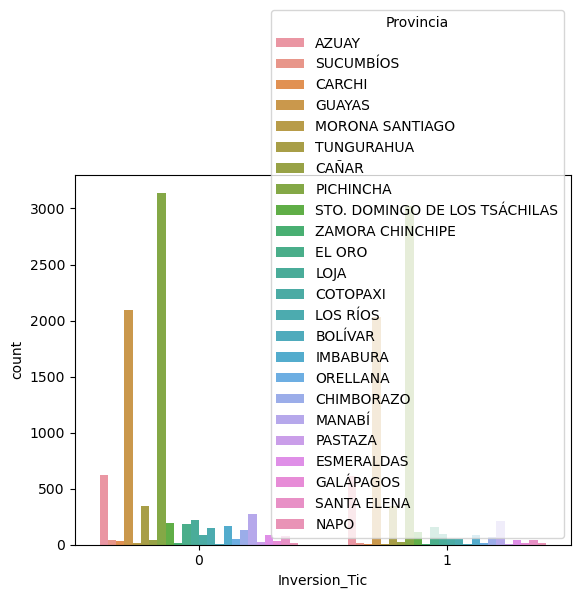

In [33]:
sns.countplot(x="Inversion_Tic", data=tesis_df, hue="Provincia")

In [34]:
tesis_df[['Personal_q_uso_Internet',
          'Internet_ba_Fija',
          'Internet_ba_Movil',
          'Uso_Email',
          'Uso_R_Sociales',
          'Pag_Web']]=tesis_df[['Personal_q_uso_Internet',
                                       'Internet_ba_Fija',
                                       'Internet_ba_Movil',
                                       'Uso_Email',
                                       'Uso_R_Sociales',
                                       'Pag_Web'
                                      ]].astype('int64')

In [35]:
tesis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15071 entries, 0 to 15070
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   año                        15071 non-null  int64  
 1   Sector_Económico           15071 non-null  object 
 2   Tamaño_Empresa             15071 non-null  object 
 3   Provincia                  15071 non-null  object 
 4   Inversion_Tic              15071 non-null  int64  
 5   Valor_Inversion            15071 non-null  float64
 6   Computador_cant            15071 non-null  int64  
 7   Pda_cant                   15071 non-null  int64  
 8   Celular_cant               15071 non-null  int64  
 9   Notebooks_cant             15071 non-null  int64  
 10  Tablet_cant                15071 non-null  int64  
 11  Conexion_Internet          15071 non-null  int64  
 12  Personal_q_uso_Internet    15071 non-null  int64  
 13  Internet_ba_Fija           15071 non-null  int

<Axes: xlabel='Inversion_Tic', ylabel='count'>

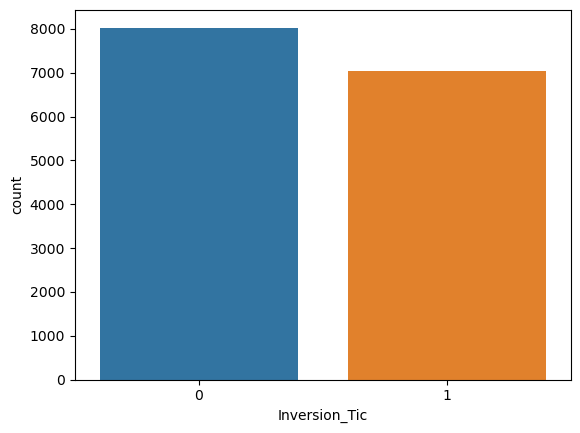

In [36]:
sns.countplot(x="Inversion_Tic", data=tesis_df)

<Axes: xlabel='Sector_Económico', ylabel='count'>

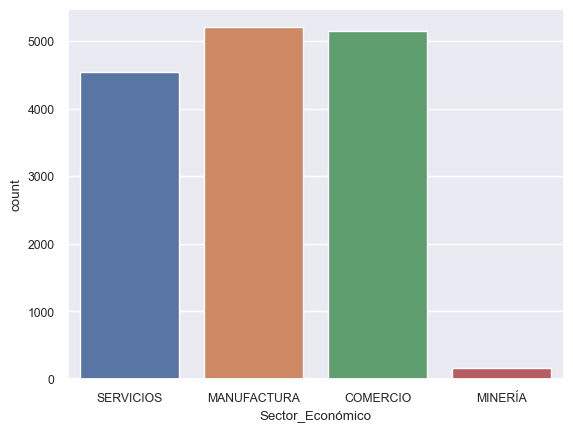

In [37]:
sns.set(font_scale=0.8)
sns.countplot(x="Sector_Económico", data=tesis_df)

<Axes: xlabel='Tamaño_Empresa', ylabel='count'>

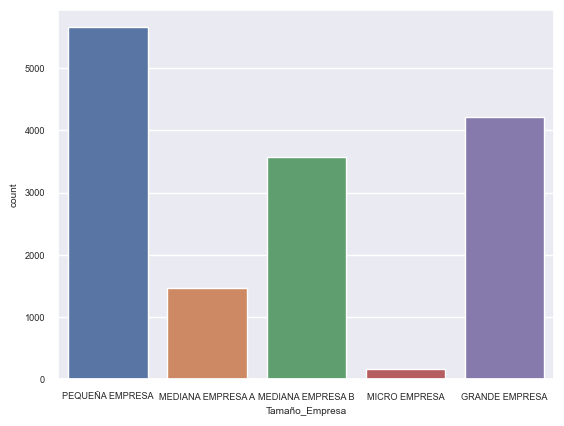

In [38]:
sns.set(font_scale=0.6)
sns.countplot(x="Tamaño_Empresa", data=tesis_df)

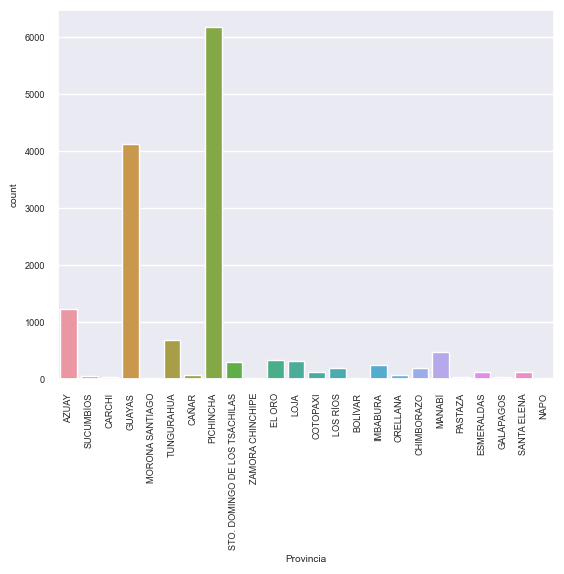

In [39]:
sns.countplot(x="Provincia", data=tesis_df)
plt.xticks(rotation=90) 
plt.show()

<Axes: >

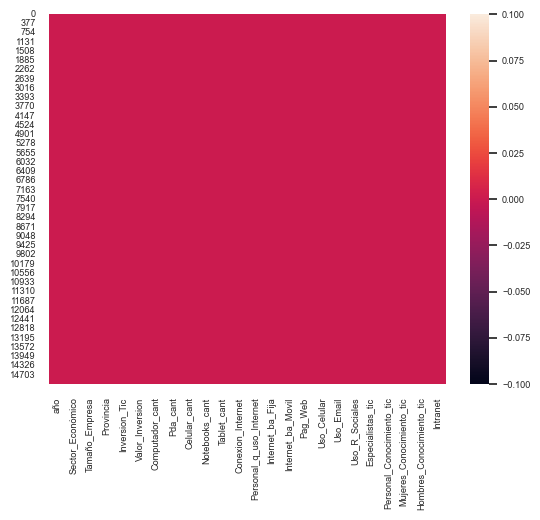

In [40]:
# Grafico para verificacion de datos nulos 
sns.heatmap(tesis_df.isna())

In [41]:
# Guardar la data limpia para poder hacer los analisis de la data (reportes en powerBI)
tesis_df.to_excel('data_BI.xlsx', index=False)

## 3. Dividir la data en train y test

In [42]:
tesis_df

,año,Sector_Económico,Tamaño_Empresa,Provincia,Inversion_Tic,Valor_Inversion,Computador_cant,Pda_cant,Celular_cant,Notebooks_cant,...,Internet_ba_Movil,Pag_Web,Uso_Celular,Uso_Email,Uso_R_Sociales,Especialistas_tic,Personal_Conocimiento_tic,Mujeres_Conocimiento_tic,Hombres_Conocimiento_tic,Intranet
0,2012,SERVICIOS,PEQUEÑA EMPRESA,AZUAY,0,0.0,5,0,0,0,...,0,1,1,1,0,0,8,3,5,0
1,2013,SERVICIOS,PEQUEÑA EMPRESA,AZUAY,1,3634.0,4,0,0,0,...,0,1,1,1,0,0,0,0,0,0
2,2014,SERVICIOS,PEQUEÑA EMPRESA,AZUAY,0,0.0,3,0,0,0,...,0,1,0,1,0,0,2,2,0,0
3,2015,SERVICIOS,PEQUEÑA EMPRESA,AZUAY,1,3064.0,3,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,2013,MANUFACTURA,PEQUEÑA EMPRESA,AZUAY,0,0.0,7,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15066,2015,COMERCIO,MEDIANA EMPRESA A,ORELLANA,0,0.0,15,0,0,0,...,0,1,1,1,1,1,20,8,12,0
15067,2015,MANUFACTURA,MEDIANA EMPRESA A,COTOPAXI,0,0.0,10,0,0,0,...,0,1,1,1,0,0,9,4,5,0
15068,2015,SERVICIOS,PEQUEÑA EMPRESA,TUNGURAHUA,1,746.0,4,0,0,0,...,0,0,1,1,1,0,4,3,1,0
15069,2015,MANUFACTURA,MEDIANA EMPRESA B,TUNGURAHUA,1,29000.0,29,0,0,0,...,0,1,1,1,1,1,33,15,18,1


In [58]:
tesis_df.describe()

,año,Inversion_Tic,Valor_Inversion,Computador_cant,Pda_cant,Celular_cant,Notebooks_cant,Tablet_cant,Conexion_Internet,Personal_q_uso_Internet,...,Internet_ba_Movil,Pag_Web,Uso_Celular,Uso_Email,Uso_R_Sociales,Especialistas_tic,Personal_Conocimiento_tic,Mujeres_Conocimiento_tic,Hombres_Conocimiento_tic,Intranet
count,15071.000000,15071.000000,1.507100e+04,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,...,15071.000000,15071.000000,15071.000000,15071.00000,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000
mean,2013.407339,0.467189,5.095299e+04,48.223476,1.671356,5.515095,7.176100,1.760799,0.958729,44.053414,...,0.154734,0.503019,0.966426,0.92469,0.506403,0.319554,9.286311,3.757349,5.528830,0.449738
std,1.104505,0.498939,7.557917e+05,244.412819,24.939544,44.431839,63.929901,16.307189,0.198924,185.809765,...,0.361663,0.500007,0.180137,0.26390,0.499976,0.466319,72.258969,30.576725,43.143868,0.497484
min,2012.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.000000,0.000000e+00,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,...,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000e+00,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,...,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2014.000000,1.000000,6.570500e+03,30.000000,0.000000,0.000000,1.000000,0.000000,1.000000,32.000000,...,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000,2.000000,2.000000,1.000000
max,2015.000000,1.000000,5.400916e+07,8500.000000,1403.000000,2520.000000,3953.000000,1000.000000,1.000000,8673.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,6451.000000,2838.000000,3613.000000,1.000000


In [43]:
# me quedo solo con las caracteristicas de valores numericos
# cols = [col for col in casas if col != casas.columns[-4]] + [casas.columns[-4]]
# casas = casas[cols]
# casas

In [44]:
tesis_df.columns  

Index(['año', 'Sector_Económico', 'Tamaño_Empresa', 'Provincia',
       'Inversion_Tic', 'Valor_Inversion', 'Computador_cant', 'Pda_cant',
       'Celular_cant', 'Notebooks_cant', 'Tablet_cant', 'Conexion_Internet',
       'Personal_q_uso_Internet', 'Internet_ba_Fija', 'Internet_ba_Movil',
       'Pag_Web', 'Uso_Celular', 'Uso_Email', 'Uso_R_Sociales',
       'Especialistas_tic', 'Personal_Conocimiento_tic',
       'Mujeres_Conocimiento_tic', 'Hombres_Conocimiento_tic', 'Intranet'],
      dtype='object')

In [45]:
# datos dependientes NO toman en cuenta al dato independiente "Y - Valor_Inversion"
X = tesis_df[['Computador_cant', 'Pda_cant',
       'Celular_cant', 'Notebooks_cant', 'Tablet_cant', 
       'Personal_q_uso_Internet', 'Internet_ba_Fija', 'Internet_ba_Movil',
       'Pag_Web', 'Uso_Celular', 'Uso_Email', 'Uso_R_Sociales',
       'Intranet']].values # DATOS DEPENDIENTES AQUI SON TODAS LAS CARACTERISTICAS
y = tesis_df[['Valor_Inversion']].values # ETIQUETA O DATOS (VARIABLE) INDEPENDIENTES 


# dividir los datos 70 y 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42) 

## 4. Entrenar el modelo 

In [46]:
lrm = LinearRegression() # creo el modelo Y SE CAMBIA SEGUN EL ALGORITMO
lrm.fit(X_train, y_train) # entreno el modelo 

LinearRegression()

## 5. Evaluar el modelo 

In [47]:
# para calcular el coeficiente de determinación R2
score = lrm.score(X_test, y_test)
print(score)

0.32673830846446394


In [48]:
print("Coeficiente de determinacion R2", lrm.score(X_train,y_train)) # entrenamiento

Coeficiente de determinacion R2 0.35729912404473374


In [48]:
print("Coeficiente de determinacion R2", lrm.error(X_train,y_train)) # entrenamiento

Coeficiente de determinacion R2 0.35729912404473374


In [49]:
# Realizar predicciones utilizando el set de prueba y la función predict.
y_pred = lrm.predict(X_test)

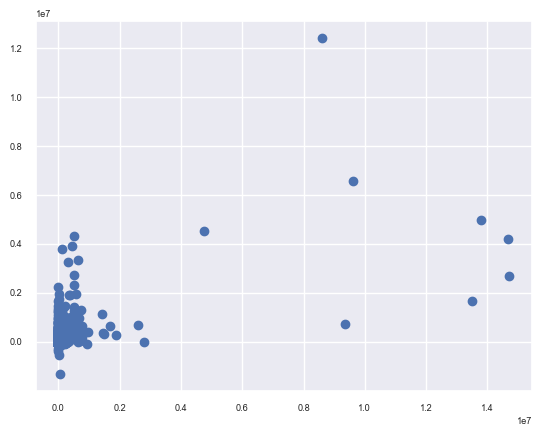

In [50]:
plt.scatter(y_test, y_pred)

In [51]:
print("Coeficiente de determinacion R2", lrm.score(X_test,y_test)) # pruebas

Coeficiente de determinacion R2 0.32673830846446394


In [52]:
print("Coeficiente de determinacion R2", lrm.score(X_test,y_pred)) # prediccion

Coeficiente de determinacion R2 1.0


In [53]:
# MAE 
metrics.mean_absolute_error(y_test, y_pred) # data original

85502.77079896364

In [54]:
# MSE
metrics.mean_squared_error(y_test, y_pred)

167356844921.0867

In [55]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

409092.7094450434

In [56]:
# Grabamos el modelo en el directorio
import pickle


In [57]:
# Grabamos el modelo en el directorio

pkl_filename = "rLineal(Valor_inv).pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lrm, file)